<a href="https://colab.research.google.com/github/malinphy/IMDB_Analysis_different_approachs/blob/main/IMDB_different_tokens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import re 
import seaborn as sns
import re
from collections import Counter
import plotly.express as px

In [2]:
data_dir ='https://raw.githubusercontent.com/malinphy/IMDB_Analysis_different_approachs/main/IMDB_Dataset_short2.csv'

data = pd.read_csv(data_dir)

data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18999 entries, 0 to 18998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     18999 non-null  object
 1   sentiment  18999 non-null  object
dtypes: object(2)
memory usage: 297.0+ KB


In [6]:
data.dtypes

review       object
sentiment    object
dtype: object

In [8]:
data['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [10]:
pos,neg= data.groupby('sentiment')['review'].nunique()[0],data.groupby('sentiment')['review'].nunique()[1]
pols = pos, neg

pols_name =  ['pos', ' neg'] 

pols_name

['pos', ' neg']

In [12]:
my_fig = px.bar(
                x = pols_name,  y= pols,color=["rgb(254, 217,166)", "goldenrod"],
                template  ="plotly_dark",
                labels=["bara","bir"], 
                width = 600 , 
                height = 500
               )
#my_fig.update_layout(legends=(["bara","bir"]))
my_fig.show()

In [13]:
def word_counter(x):
    
    splitter = []
    for i in x:
        var1 = i.split()
        for j in var1:
            splitter.append(j)
            
    word_number_count = Counter(splitter).most_common()
    
    words = []
    words_number = []
    
    for i in word_number_count:
        words.append(i[0])
        words_number.append(i[1])
    
    
    words = words[0:50]
    words_number = words_number[0:50]
    return words,words_number

In [14]:
X,y=word_counter(data['review'])



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<function matplotlib.pyplot.show>

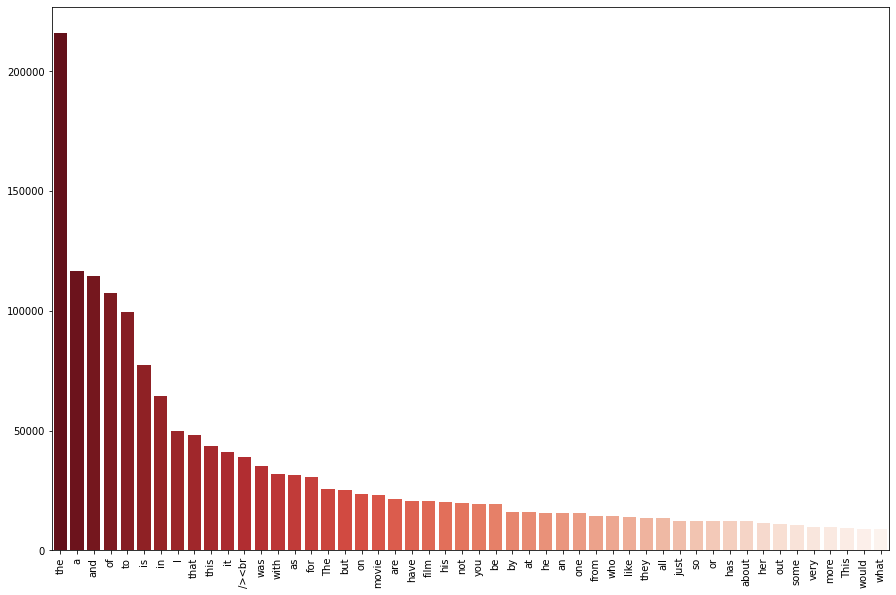

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(X,y, palette="Reds_r")
plt.xticks(rotation=90)
plt.show

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



(-100.0, 6000.0)

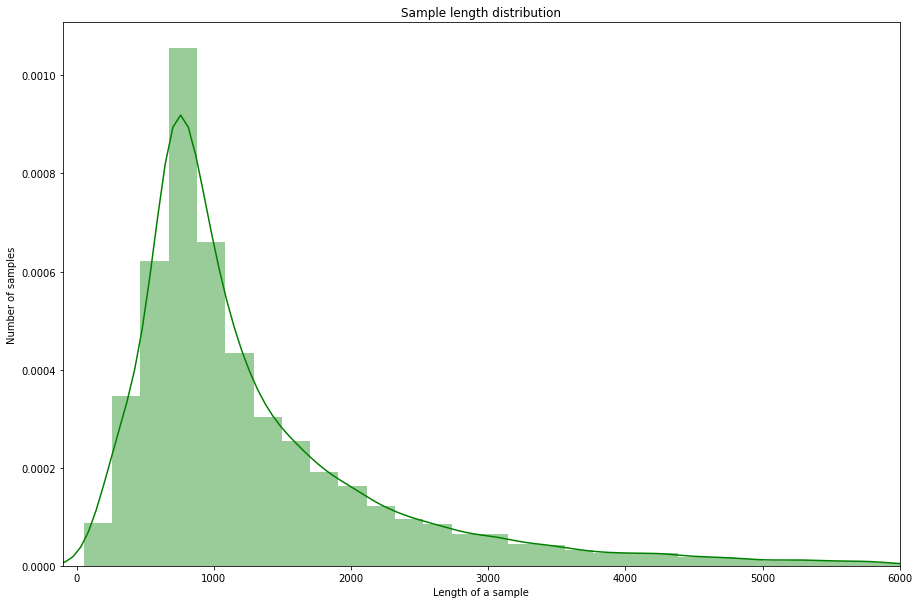

In [16]:
plt.figure(figsize=(15,10))
sns.distplot([len(s) for s in data['review']], 50  , color="green")
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Sample length distribution')
plt.xlim([-100,6000])

In [17]:
data_reviews = data['review'].copy()

In [18]:
from sklearn.model_selection import train_test_split

train_reviews , test_review = train_test_split(data_reviews , train_size= 0.8 , random_state= 42)

In [19]:
train_reviews.shape, test_review.shape

((15199,), (3800,))

In [20]:
for i in range(len(data_reviews)):
    data_reviews[i] =  re.sub(r"\b'll"," will",data_reviews[i])
    data_reviews[i] =  re.sub("n't"," not",data_reviews[i])
    data_reviews[i] = re.sub("<br /><br />|,|\?|\(|\)|\"|!|:|@|#|&|\+"," ",data_reviews[i])
    data_reviews[i] = re.sub("-|_|\."," ",data_reviews[i])
    data_reviews[i] = data_reviews[i].lower()
    data_reviews[i] = re.sub("1|2|3|4|5|6|7|8|9|0","",data_reviews[i])
    data_reviews[i] = re.sub("  "," ",data_reviews[i])
    data_reviews[i] = re.sub("   "," ",data_reviews[i])

In [21]:
data_reviews[1]

"a wonderful little production  the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece  the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams' diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master's of comedy and his life  the realism really comes home with the little things the fantasy of the guard which rather than use the traditional 'dream' techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell's murals decorating every surface are terribly well done "

In [22]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
vectorizer = CountVectorizer(stop_words='english',lowercase=True)

reviews_vector = vectorizer.fit_transform(data_reviews)
#vectorizer.get_feature_names()

In [ ]:
reviews_vector.toarray().shape

(18999, 67017)

In [ ]:

#vectorizer for the sentiment values

sentiment_scores = data['sentiment'].copy()

sentiment_vectorizer = CountVectorizer().fit_transform(sentiment_scores)
sentiment_vector=sentiment_vectorizer.toarray()

In [ ]:
sentiment_vector_1D = np.zeros(len(sentiment_vector))


for i in range(len(sentiment_vector)):
    sentiment_vector_1D[i] = sentiment_vector[i][0]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
reviews_train, reviews_test , sentiment_train, sentiment_test = train_test_split(
                                                                reviews_vector, sentiment_vector_1D,
                                                                train_size = 0.8 , random_state=42)

In [ ]:
reviews_train.shape, reviews_test.shape, sentiment_train.shape, sentiment_test.shape

((15199, 67017), (3800, 67017), (15199,), (3800,))

$\textbf{Logistic Regression classifier}$

In [ ]:

from sklearn.linear_model import LogisticRegression

LG = LogisticRegression()

LG.fit(reviews_train,sentiment_train)

sentiment_predict_score_LG=LG.predict(reviews_test)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
reviews_train[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
sentiment_predict_score_LG

array([0., 1., 0., ..., 1., 1., 0.])

In [ ]:
sentiment_test

array([0., 1., 0., ..., 1., 0., 0.])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
y_true_LG = sentiment_test 
y_pred_LG = sentiment_predict_score_LG

LG_metrics=precision_recall_fscore_support(y_true_LG,y_pred_LG,average=None)
confusion_matrix(y_true_LG, y_pred_LG)

array([[1671,  209],
       [ 238, 1682]])

In [ ]:
accuracy_score(y_true_LG, y_pred_LG)

0.8823684210526316

In [ ]:
import seaborn as sn

Text(0.5, 1.0, 'confusion matrix without normalization Logistic Regression')

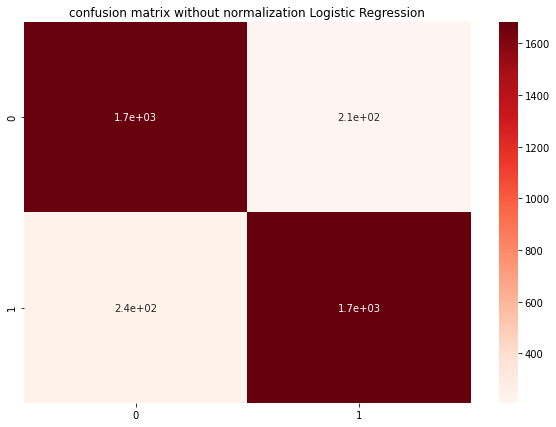

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_true_LG, y_pred_LG),annot=True,cmap=plt.cm.Reds)
plt.title('confusion matrix without normalization Logistic Regression')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=0)

DTC_fit=DTC.fit(reviews_train,sentiment_train)

sentiment_predict_score_DTC=DTC_fit.predict(reviews_test)

y_true_DTC = sentiment_test 
y_pred_DTC = sentiment_predict_score_DTC

DTC_metrics=precision_recall_fscore_support(y_true_DTC,y_pred_DTC,average=None)
confusion_matrix(y_true_DTC, y_pred_DTC)

array([[1365,  515],
       [ 537, 1383]])

In [ ]:
accuracy_score(y_true_DTC,y_pred_DTC)

0.7231578947368421

Text(0.5, 1.0, 'confusion matrix without normalization for Decision Tree')

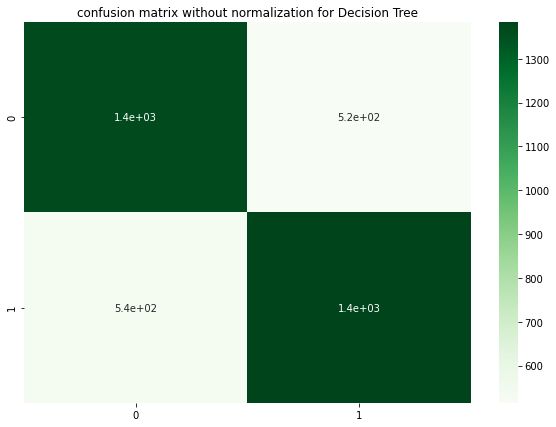

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_true_DTC, y_pred_DTC),annot=True,cmap=plt.cm.Greens)
plt.title('confusion matrix without normalization for Decision Tree')

$\textit{Random Forest Classifier}$

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC= RandomForestClassifier()
RFC_fit=RFC.fit(reviews_train,sentiment_train)
sentiment_predict_score_RFC=RFC_fit.predict(reviews_test)

y_true_RFC = sentiment_test 
y_pred_RFC = sentiment_predict_score_DTC

RF_metrics=precision_recall_fscore_support(y_true_RFC,y_pred_RFC,average=None)
confusion_matrix(y_true_RFC, y_pred_RFC)

array([[1365,  515],
       [ 537, 1383]])

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
def different_classifiers(X_train,y_train,X_test,y_test):

    #------ LOGISTIC REGRESSION
    
    LG = LogisticRegression()

    LG.fit(X_train,y_train)

    sentiment_predict_score_LG=LG.predict(X_test)
    
    y_true_LG = y_test 
    y_pred_LG = sentiment_predict_score_LG

    LG_metrics=precision_recall_fscore_support(y_true_LG,y_pred_LG,average=None)
    LG_confusion_matrix=confusion_matrix(y_true_LG, y_pred_LG)
    accuracy_LG=accuracy_score(y_true_LG, y_pred_LG)
    
    #------ LOGISTIC REGRESSION
    
    
    
    #------ RANDOM FOREST CLASSIFIER
    
    RFC= RandomForestClassifier()
    RFC_fit=RFC.fit(X_train,y_train)
    sentiment_predict_score_RFC=RFC_fit.predict(X_test)

    y_true_RFC = y_test  
    y_pred_RFC = sentiment_predict_score_RFC

    RFC_metrics=precision_recall_fscore_support(y_true_RFC,y_pred_RFC,average=None)
    RFC_confusion_matrix = confusion_matrix(y_true_RFC, y_pred_RFC)
    accuracy_RFC=accuracy_score(y_true_RFC, y_pred_RFC)
    #------ RANDOM FOREST CLASSIFIER
    
    
    #------ DECISION TREE CLASSIFIER
    
    DTC = DecisionTreeClassifier(random_state=0 )  
    DTC_fit = DTC.fit(X_train,y_train)
    sentiment_predict_score_DTC=DTC_fit.predict(X_test)
                                 
    y_true_DTC = y_test 
    y_pred_DTC = sentiment_predict_score_DTC

    DTC_metrics=precision_recall_fscore_support(y_true_DTC,y_pred_DTC,average=None)
    DTC_confusion_matrix = confusion_matrix(y_true_DTC, y_pred_DTC)
    accuracy_DTC=accuracy_score(y_true_DTC, y_pred_DTC)
    #------ DECISION TREE CLASSIFIER
    
    
    return (LG_confusion_matrix,
            RFC_confusion_matrix,
            DTC_confusion_matrix,
            accuracy_LG,
            accuracy_RFC,
            accuracy_DTC)

In [ ]:
(Logistic_Reg, 
 Random_For,
 Decision_Tree,
 Logistic_Reg_accuracy, 
 Random_For_accuracy,
 Decision_Tree_accuracy) = different_classifiers(reviews_train,
                                                 sentiment_train,
                                                 reviews_test,
                                                 sentiment_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
 print("Logistic Regression Accuracy :\n",Logistic_Reg_accuracy), 
 print("Random Forest Accuracy:\n",Random_For_accuracy,)
 print("Decision Accuracy:\n",Decision_Tree_accuracy)

Logistic Regression Accuracy :
 0.8823684210526316
Random Forest Accuracy:
 0.8568421052631578
Decision Accuracy:
 0.7231578947368421


In [ ]:
print("Logistic Regression CM :\n",Logistic_Reg) ,
print("Random Forest CM:\n",Random_For), 
print("Decision Tree CM : \n", Decision_Tree)

Logistic Regression CM :
 [[1671  209]
 [ 238 1682]]
Random Forest CM:
 [[1630  250]
 [ 294 1626]]
Decision Tree CM : 
 [[1365  515]
 [ 537 1383]]


In [ ]:
reviews_train.shape, reviews_test.shape, sentiment_train.shape, sentiment_test.shape

((15199, 67017), (3800, 67017), (15199,), (3800,))

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
keras_tokenizer = Tokenizer()

In [ ]:
keras_tokenizer.fit_on_texts(data_reviews)

data_reviews_corpus = keras_tokenizer.word_index
# data_reviews_corpus_np = np.array(data_reviews_corpus)

keras_sequence = keras_tokenizer.texts_to_sequences(data_reviews)

In [ ]:
len(keras_sequence[9])

32

In [ ]:
padded_keras_sequence = pad_sequences(keras_sequence,padding='post')

In [ ]:
#pad_sequences()

In [ ]:
#keras_data_reviews=(keras_tokenizer.texts_to_matrix(data_reviews))
#

In [ ]:
reviews_train_keras, reviews_test_keras , sentiment_train_keras, sentiment_test_keras = train_test_split(
                                                                padded_keras_sequence,
                                                                sentiment_vector_1D,
                                                                train_size = 0.8 ,
                                                                random_state=42)

In [ ]:
DTC_keras = DecisionTreeClassifier(random_state=0)

DTC_fit_keras=DTC_keras.fit(reviews_train_keras,sentiment_train_keras)

sentiment_predict_score_DTC_keras=DTC_fit_keras.predict(reviews_test_keras)

y_true_DTC_keras = sentiment_test_keras 
y_pred_DTC_keras = sentiment_predict_score_DTC_keras

DTC_metrics_keras=precision_recall_fscore_support(y_true_DTC_keras,y_pred_DTC_keras,average=None)
confusion_matrix(y_true_DTC_keras, y_pred_DTC_keras)

array([[ 943,  937],
       [ 914, 1006]])

In [ ]:
(Logistic_Reg_keras, 
 Random_For_keras,
 Decision_Tree_keras,
 Logistic_Reg_accuracy_keras,     
 Random_For_accuracy_keras,
 Decision_Tree_accuracy_keras) = different_classifiers(reviews_train_keras,
                                                     sentiment_train_keras,
                                                     reviews_test_keras,
                                                     sentiment_test_keras)

print("Logistic Regression Accuracy Keras :\n",Logistic_Reg_accuracy), 
print("Random Forest Accuracy Keras:\n",Random_For_accuracy,)
print("Decision Accuracy Keras:\n",Decision_Tree_accuracy)


print("Logistic Regression CM_keras :\n",Logistic_Reg_keras) ,
print("Random Forest CM_keras:\n",Random_For_keras), 
print("Decision Tree CM_keras : \n", Decision_Tree_keras)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Accuracy Keras :
 0.8823684210526316
Random Forest Accuracy Keras:
 0.8568421052631578
Decision Accuracy Keras:
 0.7231578947368421
Logistic Regression CM_keras :
 [[996 884]
 [967 953]]
Random Forest CM_keras:
 [[1015  865]
 [ 894 1026]]
Decision Tree CM_keras : 
 [[ 943  937]
 [ 914 1006]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidf_vectors = TfidfVectorizer(stop_words = 'english', 
                                lowercase=True)

total_text = tfidf_vectors.fit_transform(data_reviews)

reviews_train_tf_IDF, reviews_test_tf_IDF= train_test_split(
                                                            total_text,
                                                            train_size = 0.8 , random_state=42)

In [ ]:
reviews_train_tf_IDF.shape, reviews_test_tf_IDF, sentiment_train.shape,sentiment_test.shape

((15199, 67017), <3800x67017 sparse matrix of type '<class 'numpy.float64'>'
 	with 328159 stored elements in Compressed Sparse Row format>, (15199,), (3800,))

In [ ]:
(Logistic_Reg_tf_IDF, 
 Random_For_tf_IDF,
 Decision_Tree_tf_IDF,
 Logistic_Reg_accuracy_tf_IDF,     
 Random_For_accuracy_tf_IDF,
 Decision_Tree_accuracy_tf_IDF) = different_classifiers(reviews_train_tf_IDF,
                                                     sentiment_train,
                                                     reviews_test_tf_IDF,
                                                     sentiment_test)

print("Logistic Regression Accuracy tf_IDF :\n",Logistic_Reg_accuracy), 
print("Random Forest Accuracy tf_IDF:\n",Random_For_accuracy,)
print("Decision Tree Accuracy tf_IDF :\n",Decision_Tree_accuracy)


print("Logistic Regression CM_tf_IDF :\n",Logistic_Reg_keras) ,
print("Random Forest CM_tf_IDF:\n",Random_For_keras), 
print("Decision Tree CM_tf_IDF : \n", Decision_Tree_keras)

Logistic Regression Accuracy tf_IDF :
 0.8823684210526316
Random Forest Accuracy tf_IDF:
 0.8568421052631578
Decision Tree Accuracy tf_IDF :
 0.7231578947368421
Logistic Regression CM_tf_IDF :
 [[996 884]
 [967 953]]
Random Forest CM_tf_IDF:
 [[1015  865]
 [ 894 1026]]
Decision Tree CM_tf_IDF : 
 [[ 943  937]
 [ 914 1006]]


In [ ]:
#After this point I will try the GENSIM API

In [ ]:
import gensim 
from gensim import corpora
from pprint import pprint
from gensim.models.word2vec import Word2Vec

In [ ]:
word_token = []
for i in data_reviews:
  word_token.append(i.split())


single_array_token = []

for i in word_token:
  for j in range(len(i)):
    single_array_token.append(i[j])

In [ ]:
total_corpora = corpora.Dictionary(word_token)

In [ ]:
imdb_wv_model = Word2Vec(word_token,min_count = 0 ,size = 100)

In [ ]:
imdb_wv_model['of']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 1.0314085 , -0.36710086,  0.24915344,  0.82551646,  1.7930245 ,
        3.7108922 ,  0.16170144,  2.0713663 ,  1.1112678 , -0.9162379 ,
       -0.5600038 , -0.14171815,  0.98901683,  2.6603801 , -2.2560031 ,
        1.4907439 , -1.6854786 , -0.22330375, -0.75167453, -2.6669471 ,
       -0.27335194,  0.4064362 , -1.8801887 ,  1.2303734 , -0.13389178,
        0.4711822 ,  1.3448564 ,  0.14895467,  0.2652474 ,  2.6069043 ,
       -0.6004317 ,  0.4458706 ,  1.6986796 ,  2.468217  , -0.28649879,
        1.2090733 ,  0.5016751 , -1.0760095 , -0.33184403, -2.3130012 ,
       -2.4376621 , -0.8567129 ,  0.55360323, -0.77311593,  1.7861762 ,
        1.6159639 , -0.8202328 ,  0.05005048, -0.5266667 ,  0.19822916,
       -1.5041001 , -1.1838403 ,  0.26994112,  0.18751761, -0.33432454,
        0.6866918 ,  0.7818592 ,  0.87244624,  1.0305849 , -1.9451705 ,
        1.9722307 ,  1.0960906 , -1.0691068 , -0.7013776 ,  1.7597697 ,
       -1.1755611 , -0.25370243,  2.29852   ,  0.76729673, -0.43